In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression

mat = scipy.io.loadmat('ex3data1.mat')
X = mat['X']
y = mat['y']
num_labels = len(np.unique(y))

In [2]:
def displayData(x):
    
    if len(x.shape) ==1: num_image,pixels = 1, x.shape[0]
    else:    num_image, pixels = x.shape[0], x.shape[1]
    
    pix_square = int(np.sqrt(pixels))
    num_row = int(np.floor(np.sqrt(num_image)))
    num_col = int(np.ceil(num_image/num_row))
    
    pad = 1;
    img = formatPixels(x, num_row, num_col,pix_square,num_image)
    plt.figure(figsize=(num_row,num_col))
    plt.imshow(img,cmap = "gray");
    plt.axis('off');
    return pixels

def formatPixels(x, num_row, num_col,pix_square,num_image):
    pad =1;
    pix_col = pad + num_col*(pix_square + pad);
    pix_row = pad + num_row*(pix_square + pad);
    num = 0;
    img = -1*np.ones([pix_row,pix_col])
    for i in range(num_row): 
        for j in range(num_col):
            c = pad*(i+1) + i*pix_square
            img[c:c+pix_square,(pad*(j+1) + j*pix_square)+np.arange(pix_square)] = x[num,:].reshape([pix_square,pix_square]).T
            num += 1
            if num>=num_image: break;
    return img

400

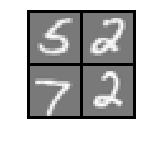

In [3]:
x = X[np.random.randint(y.size, size=4),:]
displayData(x)

In [4]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

def costFunction(theta,reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    J = J + reg/2/m*np.sum(np.square(theta[1:]))
    #print(J)
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

def gradient(theta, reg,X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1))) 
    grad =(1/m)*X.T.dot(h-y) + reg/m*np.r_[[[0]],theta[1:].reshape(-1,1)]

    return(grad.flatten())

In [16]:
X = np.c_[np.ones([y.size,1]),X]
X.shape
initial_theta = np.zeros([X.shape[1],1])

cost = costFunction(initial_theta,1, X, y==1)
grad = gradient(initial_theta,1, X, y)

print('Cost: \n', cost)
print('Grad shape: \n', grad.shape)

Cost: 
 [0.69314718]
Grad shape: 
 (402,)


In [6]:
def oneVSall(X, y, num_labels, reg):
    initial_theta = np.zeros((X.shape[1],1))
    all_theta = np.zeros([num_labels,X.shape[1]])
    
    for i in np.arange(1, num_labels+1):
        res = minimize(costFunction, initial_theta, args=(reg, X, (y==i)*1), method=None, jac=gradient, options={'maxiter':50})
        theta = res.x;
        all_theta[i-1,:] = theta
        
    return all_theta
    

In [7]:
all_theta = oneVSall(X, y, num_labels, 0.1)

In [8]:
p = np.argmax(X.dot(all_theta.T),1).reshape([-1,1])
print('accuracy:{}'.format(np.mean(p+1==y)*100))

accuracy:93.24


### Multiclass logistics regression

In [9]:
clf = LogisticRegression(C=10, penalty='l2', solver='liblinear')
# Scikit-learn fits intercept automatically, so we exclude first column with 'ones' from X when fitting.
clf.fit(X[:,1:],y.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
pred2 = clf.predict(X[:,1:])
print('Training set accuracy: {} %'.format(np.mean(pred2 == y.ravel())*100))

Training set accuracy: 96.5 %


### Neural Networks

In [11]:
mat = scipy.io.loadmat('ex3weights.mat')
theta1 = mat['Theta1']
theta2 = mat['Theta2']
num_labels = len(np.unique(y))

In [12]:
theta2.shape

(10, 26)

In [13]:
def predictNN(theta1, theta2, X):
    z2 = X.dot(theta1.T)
    a2 = np.c_[np.ones([X.shape[0],1]),sigmoid(z2)]

    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    p = np.argmax(a3,1) + 1    
    return p

In [14]:
predicted = predictNN(theta1,theta2,X)

In [15]:
print('NN accuracy:{}'.format(np.mean(predicted==y.ravel())*100))

NN accuracy:97.52
